In [251]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")


In [252]:
df = pd.read_csv(r"C:\Users\rupal\OneDrive\Desktop\Data Science\Class Notes\autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [254]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [255]:
df.replace({"?":np.nan},inplace=True)

In [256]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [257]:
df["price"] = df["price"].fillna(df["price"].median()).astype(float)

In [258]:
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median()).astype(float)

In [259]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median()).astype(float)

In [260]:
df["bore"] = df["bore"].fillna(df["bore"].median()).astype(float)
df["stroke"] = df["stroke"].fillna(df["stroke"].median()).astype(float)

In [261]:
df = pd.get_dummies(df,columns=["engine-type"])

In [262]:
df["num-of-cylinders"].replace({'four': 4, 'six': 6,'five': 5,'eight': 8,
                                'two': 2,'three': 3,'twelve': 12},inplace=True)

In [263]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [264]:
df["engine-location"].replace({'front': 1, 'rear': 0,},inplace=True)

In [265]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [266]:
df = pd.get_dummies(df,columns=["body-style"])

In [267]:
df["aspiration"].replace({'std': 0, 'turbo': 1},inplace=True)

In [268]:
df["fuel-type"].replace({'gas':1,"diesel":0},inplace=True)

In [269]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median()).astype(float)

In [270]:
df["num-of-doors"].replace({'four': 4, 'two': 2},inplace=True)

In [271]:
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)

In [272]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [273]:
df["make"].nunique()

22

In [274]:
df["make"].replace({'toyota': 1, 'nissan': 2, "mazda":3, "mitsubishi":4,"honda":5,"volkswagen":6,"subaru":7,"peugot":8,"volvo":9,"dodge":10,"mercedes-benz":11,"bmw":12,"audi":13,"plymouth":14,"saab":15,"porsche":16,"isuzu":17,"jaguar":18,"chevrolet":19,"alfa-romero":20,"renault":21,"mercury":22},inplace=True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    int64  
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [276]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [277]:
df = pd.get_dummies(df,columns=["fuel-system"])

In [304]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
fuel-system_1bbl          0
fuel-system_2bbl    

In [305]:
df.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price
symboling,1.000000,0.457484,0.075220,0.194311,-0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,...,-0.298243,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707,-0.080149
normalized-losses,0.457484,1.000000,0.046387,0.104668,-0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,...,-0.285199,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358,0.095489
make,0.075220,0.046387,1.000000,0.059248,0.121314,-0.030926,0.159728,-0.190933,0.129576,0.197262,...,-0.021040,-0.103572,-0.189524,-0.097359,-0.059248,0.033250,0.280256,-0.045546,0.122434,0.396124
fuel-type,0.194311,0.104668,0.059248,1.000000,-0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,...,-0.028183,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020,-0.112439
aspiration,-0.059866,-0.011273,0.121314,-0.401397,1.000000,0.052803,0.153897,0.057191,0.257611,0.234539,...,0.018908,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857,0.175745
num-of-doors,-0.663595,-0.348850,-0.030926,-0.188496,0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,...,0.326437,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932,0.046497
drive-wheels,-0.111150,0.133824,0.159728,-0.051874,0.153897,-0.003230,1.000000,-0.113823,0.366828,0.416076,...,0.142367,-0.188341,-0.310901,0.113823,0.051874,-0.055378,0.369782,-0.128419,0.065393,0.471504
engine-location,-0.212471,0.021510,-0.190933,-0.040070,0.057191,0.139129,-0.113823,1.000000,0.187790,0.050989,...,0.045417,0.029019,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532,-0.331459
wheel-base,-0.531954,-0.073709,0.129576,-0.308346,0.257611,0.439635,0.366828,0.187790,1.000000,0.874587,...,0.210899,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129,0.584847
length,-0.357612,-0.006837,0.197262,-0.212679,0.234539,0.385675,0.416076,0.050989,0.874587,1.000000,...,0.219683,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,0.686567


<AxesSubplot: >

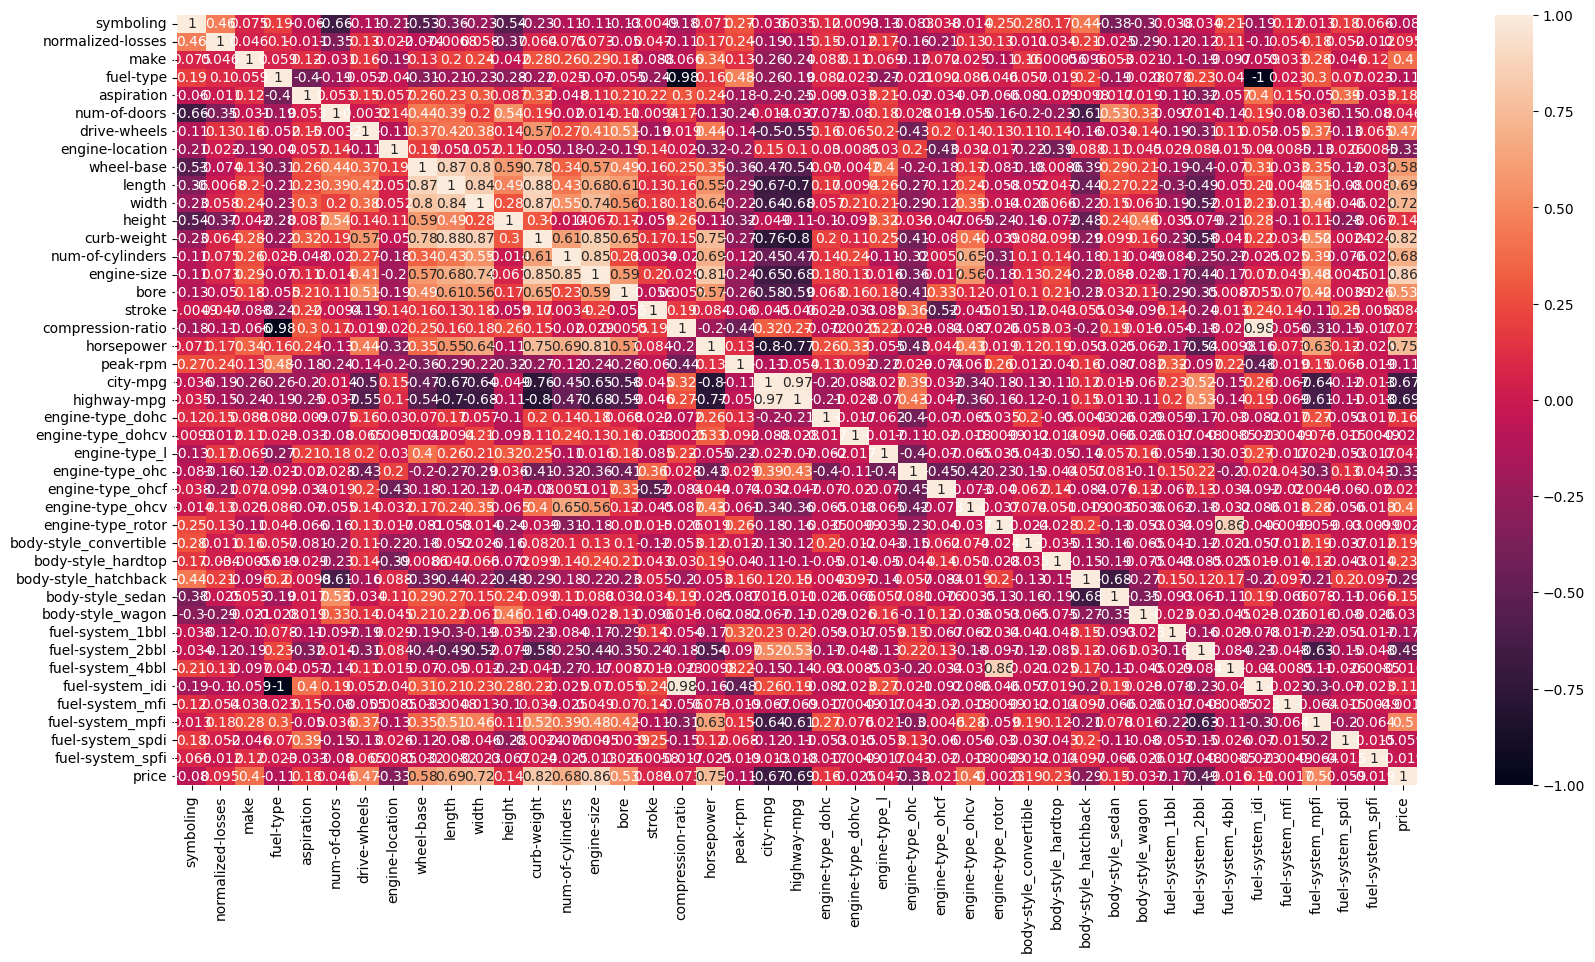

In [306]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

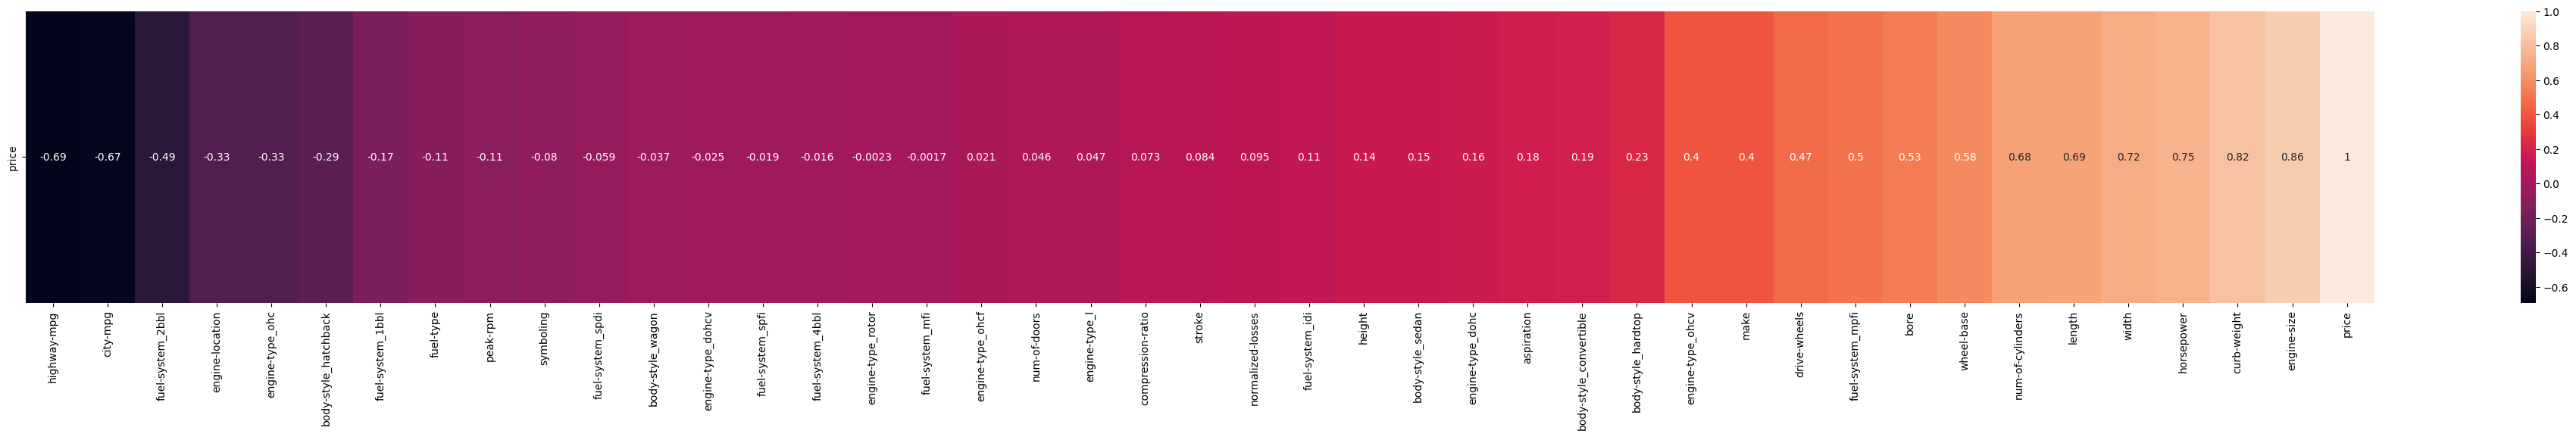

In [315]:
corr = df.corr().tail(1).sort_values("price",axis=1)
plt.figure(figsize= (50,5))
sns.heatmap(corr,annot=True)

In [282]:
x = df.drop("price",axis=1)
y = df["price"]

In [283]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=2)

In [284]:
y_train

71     34184.0
9      10295.0
118     5572.0
174    10698.0
146     7463.0
        ...   
43      6785.0
22      6377.0
72     35056.0
15     30760.0
168     9639.0
Name: price, Length: 164, dtype: float64

In [285]:
len(y_test)

41

In [286]:
lin = LinearRegression()

In [287]:
lin.fit(x_train,y_train)

LinearRegression()

In [288]:
y_pred = lin.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(f"MSE : {mse}")
rmse = np.sqrt(mse)
print(f"RMSE : {rmse}")
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE : {mae}")
r2 = r2_score(y_test,y_pred)
print(f"R2 SCORE: {r2}")

MSE : 20649868.407264795
RMSE : 4544.2126278668775
MAE : 3101.5624661692696
R2 SCORE: 0.4074483770459867


In [289]:
y_pred_train = lin.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print(f"MSE : {mse}")
rmse = np.sqrt(mse)
print(f"RMSE : {rmse}")
mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE : {mae}")
r2 = r2_score(y_train,y_pred_train)
print(f"R2 SCORE : {r2}")

MSE : 4123361.1431478662
RMSE : 2030.6061024107719
MAE : 1464.6260348972626
R2 SCORE : 0.9397923387392488


In [290]:
x = df["price"]
x

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [291]:
df = df.drop(["price"],axis=1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_sedan,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,20,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,20,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,20,1,0,2.0,1,1,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,13,1,0,4.0,0,1,99.8,176.6,...,1,0,0,0,0,0,0,1,0,0
4,2,164.0,13,1,0,4.0,2,1,99.4,176.6,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,9,1,0,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
201,-1,95.0,9,1,1,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
202,-1,95.0,9,1,0,4.0,1,1,109.1,188.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,9,0,1,4.0,1,1,109.1,188.8,...,1,0,0,0,0,1,0,0,0,0


In [292]:
df.axes

[RangeIndex(start=0, stop=205, step=1),
 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
        'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'engine-type_dohc',
        'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
        'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
        'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
        'body-style_sedan', 'body-style_wagon', 'fuel-system_1bbl',
        'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
        'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
        'fuel-system_spfi'],
       dtype='object')]

In [293]:
df.shape

(205, 42)

In [294]:
df.insert(43,x)

TypeError: DataFrame.insert() missing 1 required positional argument: 'value'

In [298]:
df1 = pd.DataFrame(x)
df1

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [302]:
df = pd.concat([df,df1],axis=1)

In [303]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price
0,3,115.0,20,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,1,0,0,13495.0
1,3,115.0,20,1,0,2.0,1,1,88.6,168.8,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,115.0,20,1,0,2.0,1,1,94.5,171.2,...,0,0,0,0,0,0,1,0,0,16500.0
3,2,164.0,13,1,0,4.0,0,1,99.8,176.6,...,0,0,0,0,0,0,1,0,0,13950.0
4,2,164.0,13,1,0,4.0,2,1,99.4,176.6,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,9,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,1,0,0,16845.0
201,-1,95.0,9,1,1,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,1,0,0,19045.0
202,-1,95.0,9,1,0,4.0,1,1,109.1,188.8,...,0,0,0,0,0,0,1,0,0,21485.0
203,-1,95.0,9,0,1,4.0,1,1,109.1,188.8,...,0,0,0,0,1,0,0,0,0,22470.0


In [317]:
df2 = pd.DataFrame(np.random.randint(10,50,(5,5)))
df2                   

,0,1,2,3,4
0,21,33,19,25,47
1,26,25,21,47,22
2,21,20,38,48,19
3,18,30,44,37,35
4,25,13,23,44,20


In [319]:
df3 = pd.DataFrame([10,20,30,40,50])


In [328]:
df2.insert(1,"new",np.random.randint(5,10,5))
df2

,0,new
0,10,8
1,20,8
2,30,9
3,40,5
4,50,6


In [327]:
df3 = pd.concat([df2,df3],axis=1)
df3

,0,0
0,10,10
1,20,20
2,30,30
3,40,40
4,50,50
